In [14]:
import glob

json_files = glob.glob("Sample/*.json")
print(f"총 JSON 파일 수: {len(json_files)}")
print("예시 파일:", json_files[:3])

import os
print("현재 작업 디렉토리:", os.getcwd())

총 JSON 파일 수: 0
예시 파일: []
현재 작업 디렉토리: /home/linux1360/ML_project


In [3]:
!pip install scikit-learn

/home/linux1360/myenv/bin/python


In [1]:
import sklearn
print(sklearn.__version__)

1.6.1


In [2]:
import json
import pandas as pd

# 정확한 경로로 수정하세요
json_path = "Sample/Labeling_Data/Part2/Clickbait_Direct/EC/EC_M02_617512_L.json"

# JSON 불러오기
with open(json_path, "r", encoding="utf-8") as f:
    raw = json.load(f)

# 주요 필드 추출
title = raw['sourceDataInfo']['newsTitle']
content = ' '.join([s['sentenceContent'] for s in raw['sourceDataInfo']['sentenceInfo']])
label = raw['labeledDataInfo'].get('clickbaitClass', None)

# DataFrame 구성
df = pd.DataFrame([{
    'title': title,
    'content': content,
    'label': label
}])

df.head()


,title,content,label
0,"금감원, 금리인상 여파에 가계대출 관리 나서",최근 미국이 기준금리를 0.25% 인상해 10년 만에 연 2%대 기준금리로 올라서면...,0


In [1]:
import sys
print(sys.executable)


/home/linux1360/venv/bin/python


In [1]:
import os

# Notebook 기준 절대경로
json_path = os.path.join(os.getcwd(), "Sample/Labeling_Data")
print("존재 여부:", os.path.exists(json_path))

존재 여부: True


In [9]:
import json
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# JSON 경로 설정
json_path = "Sample/Labeling_Data/Part2/Clickbait_Direct/EC/EC_M02_617512_L.json"

# JSON 파일 로딩
with open(json_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# 뉴스 제목
title = data['sourceDataInfo']['newsTitle']

# 뉴스 본문: sentenceInfo 내 모든 문장을 하나로 연결
# content = ' '.join([s['sentenceContent'] for s in data['sourceDataInfo']['sentenceInfo']])

# 라벨: 낚시성 여부
label = data['labeledDataInfo'].get('clickbaitClass', None)

# 데이터프레임으로 정리
df = pd.DataFrame([{
    'title': title,
    'content': content,
    'label': label
}])

In [8]:
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

title_emb = model.encode([df['title'][0]])
content_emb = model.encode([df['content'][0]])

similarity = cosine_similarity(title_emb, content_emb)[0][0]
df['similarity'] = similarity
df['mismatch_pred'] = (similarity < 0.5).astype(int)

print("제목-본문 유사도:", similarity)
print("불일치형 예측:", df['mismatch_pred'][0])


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


제목-본문 유사도: 0.8503262
불일치형 예측: 0


In [10]:
import os
import json
import pandas as pd
import glob

json_dir = "Sample/Labeling_Data/Part2/Clickbait_Direct/EC/"
json_files = glob.glob(os.path.join(json_dir, "*.json"))

data = []
for path in json_files:
    with open(path, 'r', encoding='utf-8') as f:
        try:
            raw = json.load(f)
            title = raw['sourceDataInfo']['newsTitle']
            content = ' '.join([s['sentenceContent'] for s in raw['sourceDataInfo']['sentenceInfo']])
            label = raw['labeledDataInfo'].get('clickbaitClass', None)
            if label is not None:
                data.append({'title': title, 'content': content, 'label': label})
        except Exception as e:
            print(f"❌ 오류 파일: {path}, 에러: {e}")

df = pd.DataFrame(data)
print(f"✅ 총 {len(df)}개 기사 불러옴")

✅ 총 1927개 기사 불러옴


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

emotion_keywords = ['충격', '경악', '폭로', '소름', '믿기지 않는', '눈물', '헉', '충격적', '파문']
vectorizer = TfidfVectorizer(vocabulary=emotion_keywords)
tfidf_matrix = vectorizer.fit_transform(df['title'])

df['emotion_score'] = tfidf_matrix.sum(axis=1).A1
df['emotion_pred'] = (df['emotion_score'] > 0.3).astype(int)

In [13]:
from tqdm import tqdm
import json
import os
import glob
import pandas as pd

json_dir = "Sample/Labeling_Data/Part2/Clickbait_Direct/EC/"
json_files = glob.glob(os.path.join(json_dir, "*.json"))

data = []

for path in tqdm(json_files, desc="🔍 JSON 처리 중", unit="파일"):
    try:
        with open(path, 'r', encoding='utf-8') as f:
            raw = json.load(f)
            title = raw['sourceDataInfo']['newsTitle']
            content = ' '.join([s['sentenceContent'] for s in raw['sourceDataInfo']['sentenceInfo']])
            label = raw['labeledDataInfo'].get('clickbaitClass', None)
            if label is not None:
                data.append({'title': title, 'content': content, 'label': label})
    except Exception as e:
        print(f"❌ 오류 파일: {path}, 에러: {e}")

df = pd.DataFrame(data)
print(f"✅ 총 {len(df)}개 기사 불러옴")

🔍 JSON 처리 중: 100%|█████████████████| 1927/1927 [00:00<00:00, 10829.24파일/s]

✅ 총 1927개 기사 불러옴


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm

# tqdm을 통해 진행률 표시
emotion_keywords = ['충격', '경악', '폭로', '소름', '믿기지 않는', '눈물', '헉', '충격적', '파문']
vectorizer = TfidfVectorizer(vocabulary=emotion_keywords)
tfidf_matrix = vectorizer.fit_transform(df['title'])

# 감정 점수 계산 + tqdm 추가
emotion_scores = []
for row in tqdm(tfidf_matrix, desc="🎯 감정 점수 계산 중", unit="기사"):
    emotion_scores.append(row.sum())

df['emotion_score'] = emotion_scores
df['emotion_pred'] = (df['emotion_score'] > 0.3).astype(int)

🎯 감정 점수 계산 중: 1927기사 [00:00, 25539.22기사/s]


In [16]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# 제목과 본문 임베딩 with 진행률 표시
title_embs = []
for title in tqdm(df['title'], desc="🧠 제목 임베딩 중", unit="제목"):
    title_embs.append(model.encode(title))

content_embs = []
for content in tqdm(df['content'], desc="📄 본문 임베딩 중", unit="본문"):
    content_embs.append(model.encode(content))

# 유사도 계산 with 진행률 표시
similarities = []
for i in tqdm(range(len(df)), desc="📏 유사도 계산 중", unit="쌍"):
    sim = cosine_similarity([title_embs[i]], [content_embs[i]])[0][0]
    similarities.append(sim)

# 결과 저장
df['similarity'] = similarities
df['mismatch_pred'] = (df['similarity'] < 0.5).astype(int)

📏 유사도 계산 중: 100%|██████████████████| 1927/1927 [00:00<00:00, 4577.18쌍/s]


In [17]:
# 결과 미리보기
print("\n📊 유사도 분석 결과 예시:")
print(df[['title', 'similarity', 'mismatch_pred']].head())


📊 유사도 분석 결과 예시:
                                title  similarity  mismatch_pred
0  재택근무기업 넷 중 셋은 \"코로나 종식 후에도 계속 시행\"    0.880568              0
1           디지털 뉴딜 5대 대표과제... 데이터 댐 등    0.861681              0
2         '인공지능 국가전략' 1주년 맞아 민·관 성과공유    0.864173              0
3        FTA 원산지관리, FTA-PASS로 쉽고 편리하게    0.858497              0
4               신라 금령총 94년만에 재발굴 들어간다    0.915782              0


In [18]:
from sklearn.metrics import classification_report, accuracy_score

# 정확도, 정밀도, 재현율, F1 등 성능 평가
print("\n🎯 제목-본문 불일치형 탐지 성능 평가:")
y_true = df['label']
y_pred = df['mismatch_pred']

print(classification_report(y_true, y_pred, target_names=["정상", "낚시성"]))
print(f"정확도: {accuracy_score(y_true, y_pred):.4f}")


🎯 제목-본문 불일치형 탐지 성능 평가:
              precision    recall  f1-score   support

          정상       1.00      1.00      1.00      1927
         낚시성       0.00      0.00      0.00         0

    accuracy                           1.00      1927
   macro avg       0.50      0.50      0.50      1927
weighted avg       1.00      1.00      1.00      1927

정확도: 0.9958


/home/linux1360/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linux1360/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/linux1360/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
# 라벨 분포 확인
y_counts = df['label'].value_counts()
print("\n📊 라벨 분포:")
print(y_counts)

# 낚시성 기사(label==0)가 없는 경우 경고
if 0 not in y_counts:
    print("⚠️ 경고: '낚시성' 라벨(0)이 데이터셋에 없습니다. 평가가 왜곡될 수 있습니다.")



📊 라벨 분포:
label
0    1927
Name: count, dtype: int64


In [24]:
import os
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sentence_transformers import SentenceTransformer

# 1. EC 폴더뿐만 아니라 Part1(불일치형)과 Part2(일관성 부족형) 전체 JSON 로드
base_dir = "/home/linux1360/ML_project/Sample/Labeling_Data"
json_paths = []
for part in ["Part1", "Part2"]:
    for root, _, files in os.walk(os.path.join(base_dir, part)):
        for fname in files:
            if fname.endswith(".json"):
                json_paths.append(os.path.join(root, fname))

# 2. 데이터프레임 구축
rows = []
for path in json_paths:
    try:
        with open(path, 'r', encoding='utf-8') as f:
            raw = json.load(f)
        title = raw['sourceDataInfo']['newsTitle']
        content = ' '.join(s['sentenceContent'] for s in raw['sourceDataInfo']['sentenceInfo'])
        label = raw['labeledDataInfo'].get('clickbaitClass')  # 0: 낚시성, 1: 정상
        if label in (0,1):
            rows.append((title, content, label))
    except Exception:
        continue

df = pd.DataFrame(rows, columns=['title','content','label'])
print(f"총 샘플 수: {len(df)} (낚시성: {df['label'].value_counts().to_dict()})")

# 3. BERT 임베딩
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
title_embs = model.encode(df['title'].tolist(), show_progress_bar=True)
content_embs = model.encode(df['content'].tolist(), show_progress_bar=True)

# 4. 특성 행렬 생성 (임베딩 차이)
X = np.abs(title_embs - content_embs)
y = df['label'].values

# 5. 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 6. 로지스틱 회귀 모델 학습 및 평가
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("\n🎯 로지스틱 회귀 성능:")
print(classification_report(y_test, y_pred, target_names=['clickbait','normal']))


총 샘플 수: 38409 (낚시성: {1: 23363, 0: 15046})


Batches: 100%|██████████████████████████████| 1201/1201 [00:28<00:00, 41.45it/s]



🎯 로지스틱 회귀 성능:
              precision    recall  f1-score   support

   clickbait       0.61      0.37      0.46      3009
      normal       0.68      0.85      0.75      4673

    accuracy                           0.66      7682
   macro avg       0.64      0.61      0.61      7682
weighted avg       0.65      0.66      0.64      7682



In [3]:

# 셀 1: 임포트
import os
import glob
import json
import numpy as np
import pandas as pd

from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
# 셀 2: JSON 파일 경로 수집
base_dir = "Sample/LabelingData/Part2/Clickbait_Direct/EC"
json_paths = []
for part in ["Part1", "Part2"]:
    pattern = os.path.join(base_dir, part, "**", "*.json")
    json_paths += glob.glob(pattern, recursive=True)

# 셀 2: 데이터프레임 생성
rows = []
for path in tqdm(json_paths, desc="🔍 JSON 로딩", unit="파일"):
    with open(path, "r", encoding="utf-8") as f:
        raw = json.load(f)
    title   = raw["sourceDataInfo"]["newsTitle"]
    content = " ".join(x["sentenceContent"] for x in raw["sourceDataInfo"]["sentenceInfo"])
    label   = raw["labeledDataInfo"].get("clickbaitClass")
    if label in (0,1):
        rows.append((title, content, label))

df = pd.DataFrame(rows, columns=["title","content","label"])
print(f"총 샘플: {len(df)}, 클래스 분포:\n{df['label'].value_counts()}")

🔍 JSON 로딩: 0파일 [00:00, ?파일/s]

총 샘플: 0, 클래스 분포:
Series([], Name: count, dtype: int64)


In [8]:
import glob, json, os
import numpy as np
import pandas as pd

from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer

# 1) JSON 경로 설정
json_dir = "Sample/Labeling_Data/Part2/Clickbait_Direct/EC"
json_paths = glob.glob(os.path.join(json_dir, "*.json"))
print(f"▶ JSON 파일 개수: {len(json_paths)}")

# 2) DataFrame으로 불러오기
rows = []
for path in json_paths:
    with open(path, 'r', encoding='utf-8') as f:
        raw = json.load(f)
    title   = raw['sourceDataInfo']['newsTitle']
    content = " ".join(s['sentenceContent'] for s in raw['sourceDataInfo']['sentenceInfo'])
    label   = raw['labeledDataInfo'].get('clickbaitClass')
    if label in (0,1):
        rows.append((title, content, label))

df = pd.DataFrame(rows, columns=['title','content','label'])
print("▶ 클래스 분포:\n", df['label'].value_counts(), "\n")

▶ JSON 파일 개수: 1927
▶ 클래스 분포:
 label
0    1927
Name: count, dtype: int64 



In [9]:
model    = SentenceTransformer('paraphrase-MiniLM-L6-v2')
t_emb    = model.encode(df['title'].tolist(), show_progress_bar=True)
c_emb    = model.encode(df['content'].tolist(), show_progress_bar=True)
X_embed  = np.abs(t_emb - c_emb)

Batches: 100%|██████████████████████████████████| 61/61 [00:02<00:00, 25.07it/s]


In [12]:
emo_kw   = ['충격','경악','폭로','소름','눈물']
tfidf    = TfidfVectorizer(vocabulary=emo_kw)
emo_sc   = tfidf.fit_transform(df['title']).sum(axis=1).A1

In [16]:
import os
import glob
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. JSON 파일 경로 설정
clickbait_dir = "Sample/Labeling_Data/Part2/Clickbait_Direct/EC"
noncb_dir    = "Sample/Labeling_Data/Part2/NonClickbait_Auto/EC"

paths = []
# 클릭베이트(0) 경로
for path in glob.glob(os.path.join(clickbait_dir, "*.json")):
    paths.append((path, 0))
# 논클릭베이트(1) 경로
for path in glob.glob(os.path.join(noncb_dir, "*.json")):
    paths.append((path, 1))

# 2. 데이터로딩
rows = []
for path, lbl in paths:
    with open(path, 'r', encoding='utf-8') as f:
        raw = json.load(f)
    title   = raw['sourceDataInfo']['newsTitle']
    content = " ".join(x['sentenceContent'] for x in raw['sourceDataInfo']['sentenceInfo'])
    rows.append((title, content, lbl))

# DataFrame 생성
df = pd.DataFrame(rows, columns=['title','content','label'])
print(f"샘플 수: {len(df)}, 클래스 분포:\n{df['label'].value_counts()}\n")

# 3. 특징 생성
model    = SentenceTransformer('paraphrase-MiniLM-L6-v2')
t_emb    = model.encode(df['title'].tolist(), show_progress_bar=True)
c_emb    = model.encode(df['content'].tolist(), show_progress_bar=True)
X_embed  = np.abs(t_emb - c_emb)

emo_kw   = ['충격','경악','폭로','소름','눈물']
tfidf    = TfidfVectorizer(vocabulary=emo_kw)
emo_sc   = tfidf.fit_transform(df['title']).sum(axis=1).A1

X = np.hstack([X_embed, emo_sc.reshape(-1,1)])
y = df['label'].values

# 4. 유효성 확인 및 평가
unique_labels = np.unique(y)
if len(unique_labels) < 2:
    print(f"⚠️ 경고: 단일 클래스만 존재합니다 ({unique_labels[0]}). 평가를 생략합니다.")
else:
    clf = LogisticRegression(max_iter=1000)
    cv  = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    acc = cross_val_score(clf, X, y, cv=cv, scoring='accuracy').mean()
    f1  = cross_val_score(clf, X, y, cv=cv, scoring='f1').mean()
    print(f"▶ General Model – Accuracy: {acc:.3f},  F1: {f1:.3f}")


샘플 수: 6574, 클래스 분포:
label
1    4647
0    1927
Name: count, dtype: int64



Batches: 100%|████████████████████████████████| 206/206 [00:08<00:00, 24.71it/s]


▶ General Model – Accuracy: 0.724,  F1: 0.824


샘플 수: 11921, 클래스 분포:
label
1    9994
0    1927
Name: count, dtype: int64

[감정 자극형 제목 탐지 결과: 임계값 튜닝]
Threshold=0.0, F1-score=0.001
Threshold=0.1, F1-score=0.001
Threshold=0.2, F1-score=0.001
Threshold=0.3, F1-score=0.001
Threshold=0.4, F1-score=0.001
Threshold=0.5, F1-score=0.001
Threshold=0.6, F1-score=0.001
Threshold=0.7, F1-score=0.001
Threshold=0.8, F1-score=0.001
Threshold=0.9, F1-score=0.001

[최적 임계값 = 0.0]
              precision    recall  f1-score   support

   clickbait       0.16      1.00      0.28      1927
      normal       0.83      0.00      0.00      9994

    accuracy                           0.16     11921
   macro avg       0.50      0.50      0.14     11921
weighted avg       0.72      0.16      0.05     11921



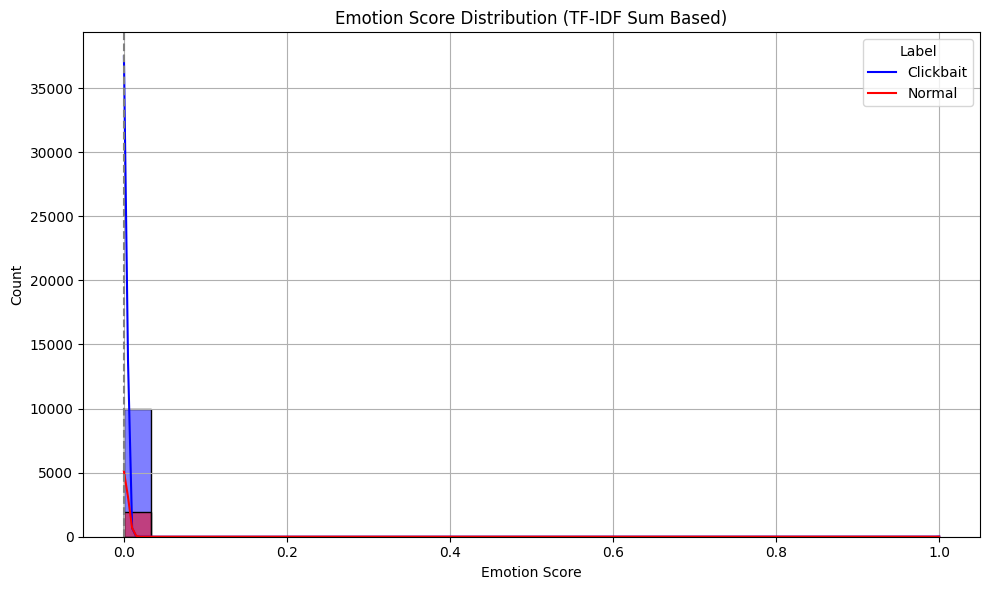

In [37]:
import os
import glob
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, f1_score

# 1. 경로 설정
clickbait_dir = "Sample/Labeling_Data/Part2/Clickbait_Direct/EC"
noncb_dir     = "Sample/Labeling_Data/Part2/NonClickbait_Auto/IS"

# 2. 데이터 로딩
paths = []
paths += [(p, 0) for p in glob.glob(os.path.join(clickbait_dir, "*.json"))]
paths += [(p, 1) for p in glob.glob(os.path.join(noncb_dir, "*.json"))]

data = []
for path, lbl in paths:
    with open(path, 'r', encoding='utf-8') as f:
        raw = json.load(f)
    title = raw['sourceDataInfo']['newsTitle']
    data.append((title, lbl))

df = pd.DataFrame(data, columns=['title', 'label'])
print(f"샘플 수: {len(df)}, 클래스 분포:\n{df['label'].value_counts()}\n")

# 3. 감정 키워드 기반 TF-IDF 점수 계산
emo_keywords = ['충격', '경악', '폭로', '소름', '믿기지 않는', '눈물', '헉', '충격적', '파문']
tfidf = TfidfVectorizer(vocabulary=emo_keywords)
tfidf_matrix = tfidf.fit_transform(df['title'])
df['emotion_score'] = tfidf_matrix.sum(axis=1).A1

# 4. 임계값별 F1-score 평가
thresholds = np.arange(0.0, 1.0, 0.1)
print("[감정 자극형 제목 탐지 결과: 임계값 튜닝]")
best_f1, best_thr = 0, 0
for t in thresholds:
    pred = (df['emotion_score'] > t).astype(int)
    f1 = f1_score(df['label'], pred)
    print(f"Threshold={t:.1f}, F1-score={f1:.3f}")
    if f1 > best_f1:
        best_f1, best_thr = f1, t

# 5. 최적 임계값 기준 리포트 출력
df['pred'] = (df['emotion_score'] > best_thr).astype(int)
print(f"\n[최적 임계값 = {best_thr:.1f}]")
print(classification_report(df['label'], df['pred'], target_names=['clickbait', 'normal']))

# 6. 감정 점수 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='emotion_score', hue='label', bins=30, kde=True, palette=['red', 'blue'])
plt.axvline(x=best_thr, color='gray', linestyle='--', label=f'Threshold = {best_thr:.1f}')
plt.title("Emotion Score Distribution (TF-IDF Sum Based)")
plt.xlabel("Emotion Score")
plt.ylabel("Count")
plt.legend(title='Label', labels=['Clickbait', 'Normal'])
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
print("emotion_score > 0 인 샘플 수:", (df['emotion_score'] > 0).sum())

emotion_score > 0 인 샘플 수: 6


In [39]:
emo_keywords = ['충격','경악','폭로','소름','믿기지 않는','눈물','헉','충격적','파문']

def emotion_count(title):
    return sum([kw in title for kw in emo_keywords])

df['emotion_score'] = df['title'].apply(emotion_count)


In [40]:
from sklearn.metrics import classification_report

# 임계값은 0보다 크면 감정 자극형으로 판단
df['pred'] = (df['emotion_score'] > 0).astype(int)

print(classification_report(df['label'], df['pred'], target_names=['clickbait', 'normal']))


              precision    recall  f1-score   support

   clickbait       0.16      1.00      0.28      1927
      normal       0.82      0.00      0.00      9994

    accuracy                           0.16     11921
   macro avg       0.49      0.50      0.14     11921
weighted avg       0.71      0.16      0.05     11921



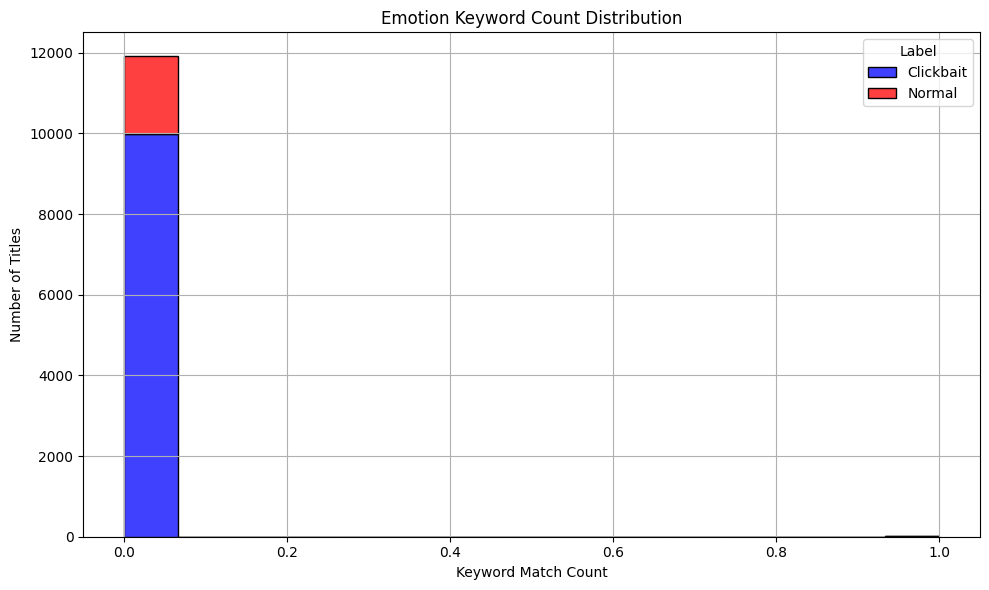

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='emotion_score', hue='label', bins=15, palette=['red', 'blue'], multiple='stack')
plt.title("Emotion Keyword Count Distribution")
plt.xlabel("Keyword Match Count")
plt.ylabel("Number of Titles")
plt.legend(title='Label', labels=['Clickbait', 'Normal'])
plt.grid(True)
plt.tight_layout()
plt.show()


총 샘플 수: 38399
클래스 분포:
label
1    23362
0    15037
Name: count, dtype: int64

[감정 자극형 제목 탐지 결과: 임계값 튜닝]
Threshold=0.0, F1-score=0.002
Threshold=0.1, F1-score=0.002
Threshold=0.2, F1-score=0.002
Threshold=0.3, F1-score=0.002
Threshold=0.4, F1-score=0.002
Threshold=0.5, F1-score=0.002
Threshold=0.6, F1-score=0.002
Threshold=0.7, F1-score=0.002
Threshold=0.8, F1-score=0.002
Threshold=0.9, F1-score=0.002

[최적 임계값 = 0.0]
              precision    recall  f1-score   support

   clickbait       0.39      0.99      0.56     15037
      normal       0.26      0.00      0.00     23362

    accuracy                           0.39     38399
   macro avg       0.33      0.50      0.28     38399
weighted avg       0.31      0.39      0.22     38399



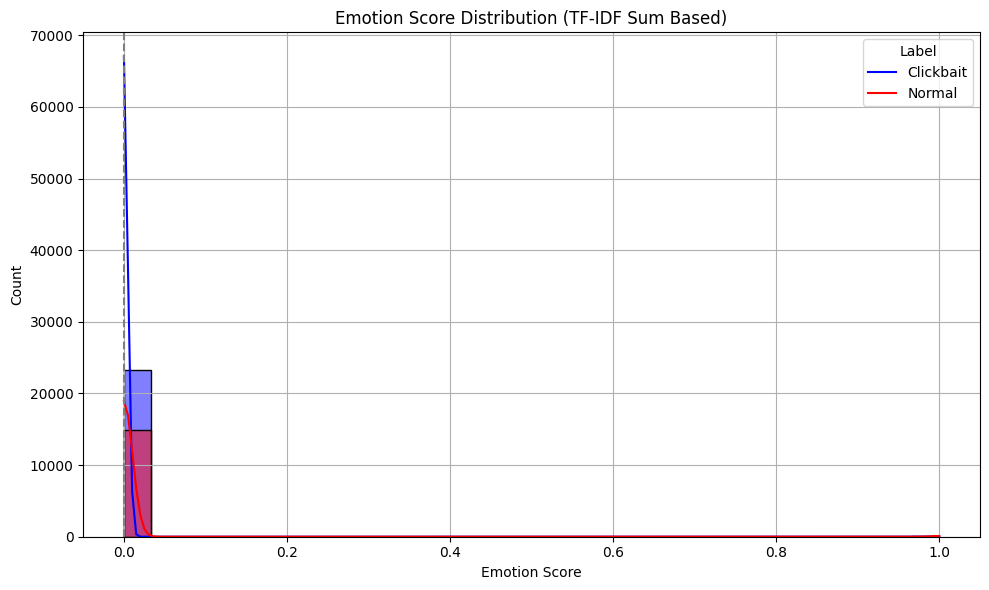

In [42]:
import os
import glob
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, f1_score

# 1. 모든 경로 지정
clickbait_dirs = [
    "Sample/Labeling_Data/Part2/Clickbait_Direct/EC",
    "Sample/Labeling_Data/Part2/Clickbait_Direct/ET",
    "Sample/Labeling_Data/Part2/Clickbait_Direct/GB",
    "Sample/Labeling_Data/Part2/Clickbait_Direct/IS",
    "Sample/Labeling_Data/Part2/Clickbait_Direct/LC",
    "Sample/Labeling_Data/Part2/Clickbait_Direct/PO",
    "Sample/Labeling_Data/Part2/Clickbait_Direct/SO"
]

nonclickbait_dirs = [
    "Sample/Labeling_Data/Part2/NonClickbait_Auto/LC",
    "Sample/Labeling_Data/Part2/NonClickbait_Auto/IS",
    "Sample/Labeling_Data/Part2/NonClickbait_Auto/EC"
]

# 2. 데이터 로딩
paths = []
for d in clickbait_dirs:
    paths += [(p, 0) for p in glob.glob(os.path.join(d, "*.json"))]
for d in nonclickbait_dirs:
    paths += [(p, 1) for p in glob.glob(os.path.join(d, "*.json"))]

data = []
for path, lbl in paths:
    with open(path, 'r', encoding='utf-8') as f:
        raw = json.load(f)
    title = raw['sourceDataInfo']['newsTitle']
    data.append((title, lbl))

df = pd.DataFrame(data, columns=['title', 'label'])
print(f"총 샘플 수: {len(df)}\n클래스 분포:\n{df['label'].value_counts()}\n")

# 3. 감정 키워드 기반 TF-IDF 점수 계산
emo_keywords = ['충격', '경악', '폭로', '소름', '믿기지 않는', '눈물', '헉', '충격적', '파문']
tfidf = TfidfVectorizer(vocabulary=emo_keywords)
tfidf_matrix = tfidf.fit_transform(df['title'])
df['emotion_score'] = tfidf_matrix.sum(axis=1).A1

# 4. 임계값 튜닝
thresholds = np.arange(0.0, 1.0, 0.1)
print("[감정 자극형 제목 탐지 결과: 임계값 튜닝]")
best_f1, best_thr = 0, 0
for t in thresholds:
    pred = (df['emotion_score'] > t).astype(int)
    f1 = f1_score(df['label'], pred)
    print(f"Threshold={t:.1f}, F1-score={f1:.3f}")
    if f1 > best_f1:
        best_f1, best_thr = f1, t

# 5. 최적 threshold로 평가
df['pred'] = (df['emotion_score'] > best_thr).astype(int)
print(f"\n[최적 임계값 = {best_thr:.1f}]")
print(classification_report(df['label'], df['pred'], target_names=['clickbait', 'normal']))

# 6. 시각화
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='emotion_score', hue='label', bins=30, kde=True, palette=['red', 'blue'])
plt.axvline(x=best_thr, color='gray', linestyle='--', label=f'Threshold = {best_thr:.1f}')
plt.title("Emotion Score Distribution (TF-IDF Sum Based)")
plt.xlabel("Emotion Score")
plt.ylabel("Count")
plt.legend(title='Label', labels=['Clickbait', 'Normal'])
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
import os
import glob
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 1. 경로 설정 및 JSON 로딩
data_dirs = [
    "Sample/Labeling_Data/Part2/Clickbait_Direct/EC",
    "Sample/Labeling_Data/Part2/Clickbait_Direct/ET",
    "Sample/Labeling_Data/Part2/Clickbait_Direct/GB",
    "Sample/Labeling_Data/Part2/Clickbait_Direct/IS",
    "Sample/Labeling_Data/Part2/Clickbait_Direct/LC",
    "Sample/Labeling_Data/Part2/Clickbait_Direct/PO",
    "Sample/Labeling_Data/Part2/Clickbait_Direct/SO",
    "Sample/Labeling_Data/Part2/NonClickbait_Auto/LC",
    "Sample/Labeling_Data/Part2/NonClickbait_Auto/IS",
    "Sample/Labeling_Data/Part2/NonClickbait_Auto/EC"
]

paths = []
for d in data_dirs:
    paths += glob.glob(os.path.join(d, "*.json"))

# 2. JSON에서 제목과 useType 추출
data = []
for path in paths:
    try:
        with open(path, 'r', encoding='utf-8') as f:
            raw = json.load(f)
        title = raw['sourceDataInfo']['newsTitle']
        label = raw['sourceDataInfo'].get('useType', None)
        if label in [0, 1] and isinstance(title, str):
            data.append((title.strip(), label))
    except Exception as e:
        print(f"⚠️ {path} 로딩 오류: {e}")

df = pd.DataFrame(data, columns=["title", "label"])
print(f"✅ 전체 샘플 수: {len(df)}")
print("📊 클래스 분포:\n", df["label"].value_counts())

# 3. 학습/검증 분할
X_train, X_test, y_train, y_test = train_test_split(df["title"], df["label"], test_size=0.2, stratify=df["label"], random_state=42)

# 4. TF-IDF 벡터화 (1-gram + 2-gram)
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 5. 로지스틱 회귀 분류기 학습
model = LogisticRegression(max_iter=1000, class_weight='balanced')

model.fit(X_train_vec, y_train)

# 6. 예측 및 평가
y_pred = model.predict(X_test_vec)
print("\n📋 최종 평가 결과 (Logistic Regression)")
print(classification_report(y_test, y_pred, target_names=["clickbait", "normal"]))

✅ 전체 샘플 수: 38399
📊 클래스 분포:
 label
1    23362
0    15037
Name: count, dtype: int64

📋 최종 평가 결과 (Logistic Regression)
              precision    recall  f1-score   support

   clickbait       0.67      0.68      0.68      3007
      normal       0.79      0.78      0.79      4673

    accuracy                           0.74      7680
   macro avg       0.73      0.73      0.73      7680
weighted avg       0.75      0.74      0.74      7680



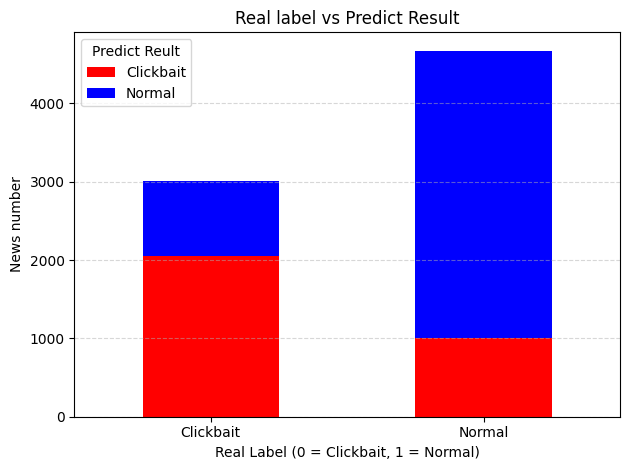

In [50]:
import matplotlib.pyplot as plt

# 1. 결과 집계
from collections import Counter
results = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
summary = results.groupby(['actual', 'predicted']).size().unstack(fill_value=0)

# 2. 막대그래프 시각화
summary.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.title("Real label vs Predict Result")
plt.xlabel("Real Label (0 = Clickbait, 1 = Normal)")
plt.ylabel("News number")
plt.xticks(ticks=[0, 1], labels=['Clickbait', 'Normal'], rotation=0)
plt.legend(title='Predict Reult', labels=['Clickbait', 'Normal'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [26]:
import os
import glob
import json
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
from sklearn.metrics import classification_report
from tqdm import tqdm

# 1. 모델 로딩 (멀티언어 지원 BERT 모델)
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

# 2. 데이터 경로 설정
data_dirs = [
    "Sample/Labeling_Data/Part2/Clickbait_Direct/EC",
    "Sample/Labeling_Data/Part2/Clickbait_Direct/ET",
    "Sample/Labeling_Data/Part2/NonClickbait_Auto/EC",
    "Sample/Labeling_Data/Part2/NonClickbait_Auto/ET"
]

paths = []
for d in data_dirs:
    paths += glob.glob(os.path.join(d, "*.json"))

# 3. 제목-본문 유사도 계산
records = []
for path in tqdm(paths, desc="Processing"):
    try:
        with open(path, "r", encoding="utf-8") as f:
            raw = json.load(f)
        title = raw['sourceDataInfo'].get('newsTitle', '').strip()
        content = raw['sourceDataInfo'].get('newsContent', '').strip()
        label = raw['sourceDataInfo'].get('useType', None)  # 0: clickbait, 1: normal
        if not title or not content or label not in [0, 1]:
            continue
        # BERT 임베딩
        embeddings = model.encode([title, content])
        sim = cosine_similarity([embeddings[0]], [embeddings[1]])[0][0]
        records.append({'title': title, 'content': content, 'similarity': sim, 'label': label})
    except Exception as e:
        print(f"[ERROR] {path}: {e}")

df = pd.DataFrame(records)
print(f"\n총 기사 수: {len(df)}")

# 4. 임계값 튜닝 및 평가
from sklearn.metrics import f1_score

print("\n📊 유사도 기반 제목-본문 불일치 탐지 결과:")
best_f1 = 0
best_thr = 0
for threshold in np.arange(0.1, 0.91, 0.1):
    df['pred'] = (df['similarity'] < threshold).astype(int)  # 유사도 낮으면 clickbait
    f1 = f1_score(df['label'], df['pred'])
    print(f"Threshold = {threshold:.2f} → F1 = {f1:.4f}")
    if f1 > best_f1:
        best_f1 = f1
        best_thr = threshold

# 5. 최종 평가
df['pred'] = (df['similarity'] < best_thr).astype(int)
print(f"\n✅ 최적 임계값 = {best_thr:.2f} (F1 = {best_f1:.4f})")
print("\n📋 최종 평가 결과:")
print(classification_report(df['label'], df['pred'], target_names=["clickbait", "normal"]))

Processing: 100%|███████████████████████████| 8320/8320 [04:18<00:00, 32.15it/s]


총 기사 수: 8320

📊 유사도 기반 제목-본문 불일치 탐지 결과:
Threshold = 0.10 → F1 = 0.0899
Threshold = 0.20 → F1 = 0.2267
Threshold = 0.30 → F1 = 0.3563
Threshold = 0.40 → F1 = 0.4477
Threshold = 0.50 → F1 = 0.5284
Threshold = 0.60 → F1 = 0.5993
Threshold = 0.70 → F1 = 0.6599
Threshold = 0.80 → F1 = 0.7032
Threshold = 0.90 → F1 = 0.7172

✅ 최적 임계값 = 0.90 (F1 = 0.7172)

📋 최종 평가 결과:
              precision    recall  f1-score   support

   clickbait       0.85      0.00      0.01      3673
      normal       0.56      1.00      0.72      4647

    accuracy                           0.56      8320
   macro avg       0.70      0.50      0.36      8320
weighted avg       0.69      0.56      0.40      8320



/tmp/ipykernel_308407/1736015061.py:12: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_308407/1736015061.py:12: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_308407/1736015061.py:12: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_308407/1736015061.py:12: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_308407/1736015061.py:12: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_308407/1736015061.py:12: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_308407/1736015061.py:12: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from font(s) DejaVu S

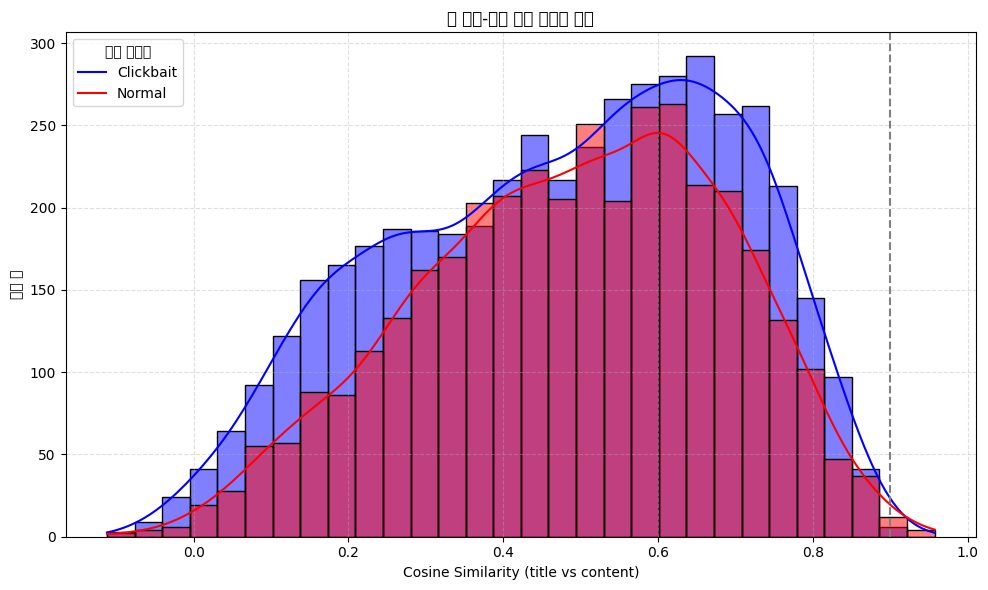

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="similarity", hue="label", bins=30, kde=True, palette=["red", "blue"])
plt.axvline(x=best_thr, color="gray", linestyle="--", label=f"Threshold = {best_thr:.2f}")
plt.title("📉 제목-본문 의미 유사도 분포")
plt.xlabel("Cosine Similarity (title vs content)")
plt.ylabel("기사 수")
plt.legend(title="실제 레이블", labels=["Clickbait", "Normal"])
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [ ]:
conf = df.groupby(['label', 'pred']).size().unstack(fill_value=0)
conf.columns = ['Pred: Clickbait', 'Pred: Normal']
conf.index = ['Actual: Clickbait', 'Actual: Normal']

conf.plot(kind="bar", stacked=True, color=["red", "blue"])
plt.title("🧮 실제 vs 예측 결과 (불일치형 탐지)")
plt.xlabel("실제 레이블")
plt.ylabel("기사 수")
plt.xticks(rotation=0)
plt.legend(title="예측 결과")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [40]:
import os, glob, json, torch
import pandas as pd
from torch.utils.data import Dataset, DataLoader, random_split
from transformers import BertTokenizer, BertForSequenceClassification
from torch.optim import AdamW 
from sklearn.metrics import classification_report
from tqdm import tqdm

# GPU 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. 데이터 로딩 및 전처리
class NewsDataset(Dataset):
    def __init__(self, df, tokenizer, max_len=128):
        self.tokenizer = tokenizer
        self.texts = df["text"].tolist()
        self.labels = df["label"].tolist()
        self.max_len = max_len

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx],
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'label': torch.tensor(self.labels[idx])
        }

# 데이터 구성
def load_data():
    dirs = [
        "Sample/Labeling_Data/Part2/Clickbait_Direct/EC",
        "Sample/Labeling_Data/Part2/Clickbait_Direct/ET",
        "Sample/Labeling_Data/Part2/NonClickbait_Auto/EC",
        "Sample/Labeling_Data/Part2/NonClickbait_Auto/ET"
    ]
    paths = [p for d in dirs for p in glob.glob(os.path.join(d, "*.json"))]
    records = []
    for path in tqdm(paths, desc="📦 Loading data"):
        try:
            with open(path, 'r', encoding='utf-8') as f:
                raw = json.load(f)
            title = raw['sourceDataInfo']['newsTitle'].strip()
            label = raw['sourceDataInfo']['useType']
            sents = raw['sourceDataInfo'].get('sentenceInfo', [])
            if not title or label not in [0, 1] or not sents:
                continue
            body = " ".join([s['sentenceContent'] for s in sents[:2]])
            text = f"{title} [SEP] {body}"
            records.append((text, label))
        except:
            continue
    df = pd.DataFrame(records, columns=["text", "label"])
    return df

# 2. 데이터 준비
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
df = load_data()
train_size = int(0.8 * len(df))
train_df, val_df = random_split(df, [train_size, len(df) - train_size])

train_ds = NewsDataset(train_df.dataset.iloc[train_df.indices], tokenizer)
val_ds = NewsDataset(val_df.dataset.iloc[val_df.indices], tokenizer)

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32)

# 3. 모델 로딩
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=2).to(device)
optimizer = AdamW(model.parameters(), lr=2e-5)

# 4. 학습 루프
def train_epoch():
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader, desc="🔧 Training"):
        optimizer.zero_grad()
        inputs = {k: v.to(device) for k, v in batch.items() if k != 'label'}
        outputs = model(**inputs, labels=batch['label'].to(device))
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

# 5. 평가 함수
def evaluate():
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for batch in val_loader:
            inputs = {k: v.to(device) for k, v in batch.items() if k != 'label'}
            outputs = model(**inputs)
            preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
            labels = batch['label'].cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels)
    print("\n📋 평가 결과:")
    print(classification_report(all_labels, all_preds, target_names=["clickbait", "normal"]))

# 6. 실행
for epoch in range(1, 4):
    print(f"\n🌟 Epoch {epoch}")
    loss = train_epoch()
    print(f"Loss: {loss:.4f}")
    evaluate()


📦 Loading data: 100%|███████████████████| 8320/8320 [00:00<00:00, 14124.93it/s]
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🌟 Epoch 1


🔧 Training: 100%|████████████████████████████| 416/416 [01:16<00:00,  5.45it/s]


Loss: 0.4259

📋 평가 결과:
              precision    recall  f1-score   support

   clickbait       0.94      0.69      0.80       736
      normal       0.80      0.96      0.87       928

    accuracy                           0.84      1664
   macro avg       0.87      0.83      0.83      1664
weighted avg       0.86      0.84      0.84      1664


🌟 Epoch 2


🔧 Training: 100%|████████████████████████████| 416/416 [01:17<00:00,  5.39it/s]


Loss: 0.3381

📋 평가 결과:
              precision    recall  f1-score   support

   clickbait       0.88      0.79      0.83       736
      normal       0.84      0.91      0.88       928

    accuracy                           0.86      1664
   macro avg       0.86      0.85      0.85      1664
weighted avg       0.86      0.86      0.86      1664


🌟 Epoch 3


🔧 Training: 100%|████████████████████████████| 416/416 [01:19<00:00,  5.25it/s]


Loss: 0.2974

📋 평가 결과:
              precision    recall  f1-score   support

   clickbait       0.85      0.83      0.84       736
      normal       0.87      0.89      0.88       928

    accuracy                           0.86      1664
   macro avg       0.86      0.86      0.86      1664
weighted avg       0.86      0.86      0.86      1664



In [43]:
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())


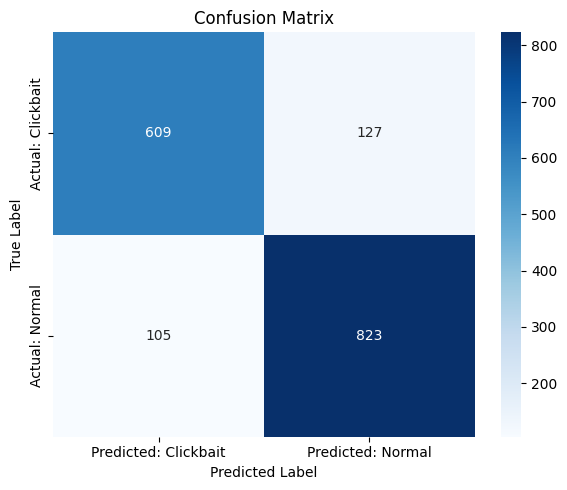

In [47]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted: Clickbait', 'Predicted: Normal'],
            yticklabels=['Actual: Clickbait', 'Actual: Normal'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

/tmp/ipykernel_308407/164469848.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")


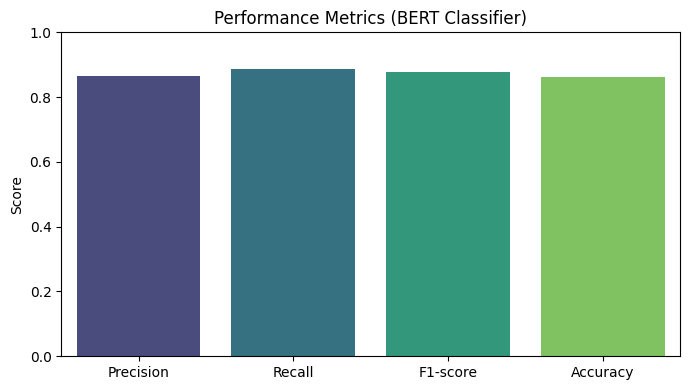

In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

metrics = {
    "Precision": precision_score(y_true, y_pred),
    "Recall": recall_score(y_true, y_pred),
    "F1-score": f1_score(y_true, y_pred),
    "Accuracy": (np.array(y_true) == np.array(y_pred)).mean()
}

plt.figure(figsize=(7, 4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")
plt.ylim(0, 1)
plt.title("Performance Metrics (BERT Classifier)")
plt.ylabel("Score")
plt.tight_layout()
plt.show()
